USDA Emissions Data - Missoula Fire Lab Emission Inventory (MFLEI) for CONUS.
https://www.fs.usda.gov/rds/archive/catalog/RDS-2017-0039

Paper on the Data - https://www.fs.fed.us/rm/pubs_journals/2018/rmrs_2018_urbanski_s001.pdf

Year - 2017
The Missoula Fire Lab Emission Inventory (MFLEI) is a retrospective, daily wildfire emission inventory for the contiguous United States with a spatial resolution of 250 meters (m). MFLEI was produced using multiple datasets of fire activity and burned area, a newly developed wildland fuels map and an updated emission factor database. This data publication contains the 2003-2015 MFLEI estimates of daily fuel consumed and emissions of CO2, CO, CH4, and PM2.5 at 250 m spatial resolution. The inventory also includes carefully constructed uncertainty estimates for daily fuel consumption and emissions at 250 m spatial resolution. The dataset includes daily emissions and uncertainties aggregated to 10 kilometer (km) × 10 km grid. The aggregated product provides area burned, mass of fuel consumed, and emissions of CO2, CO, CH4, and PM2.5. The emission and emission uncertainty data are provided as comma-delimited ASCII text files. MFLEI fuel consumption and land cover type may be combined with published emission factor datasets to estimate emissions for hundreds of volatile organic compounds and other pollutants present in fresh wildfire smoke. This data publication contains geospatial data in raster format and tabular data. The raster datasets includes a map of the coefficient of variation of the herbaceous fuel loading, a land cover map of herbaceous, shrub, and forest type groups (FIA), and maps of the upper bound, lower bound, and best estimate of herbaceous or shrub fuel loading.
 

#### Feature Descriptions
See descriptions on Google Drive as well:

1 Id   Pixel ID   
2 year  Year pixel burned    
3 Doy   Estimated day of year pixel burned    
4 Longitude   Longitude of pixel center in decimal degree  
5 Latitude   Latitude of pixel center in decimal degree     
6 Grid10k   Index of 10 km grid to be used in a future dataset of aggregated emissions   
7 Covertype   0 = Unclassified/Open Water/ Perennial Ice/Snow/Barren Land; 1 = herbaceous; 2 = shrub/scrub; 3 = forest; 21-24 = deveolped; 81 = hay/pasture; 82 = cultivated crop; 90 = woody wetlands; 95 = emergent herbaceous wetlands     
8 Fuelcode   See Table 1 in accompanying data document      
9 Area_burned  Burned area    
10 Prefire_fuel   Pre-fire dry mass of fuel       
11 Consumed_fuel   Dry mass of fuel consumed by fire     
12 ECO2 CO2   emission intensity    
13 ECO CO   emission intensity     
14 ECH4   CH4  emission intensity     
15 EPM2.5   PM2.5 emission intensity    
16 Cwd_frac   Mass fraction of fuel consumed (consumed_fuel) that was coarse woody debris     
17 Duff_frac   Mass fraction of fuel consumed (consumed_fuel) that was duff     
18 Fuel_moisture_class   Code for fuel moisture class: 1 = very dry; 2 = dry; 3 = moderate; 4 = moist (see Table 7 of accompanying data document)      
19 Burn_source   Source of fire activity data that identified this pixel as burned. 1 = MTBS; 2 = MCD64; 3 = GEOMAC; 4 = FOD     
20 Burnday_source   Source or method used to estimate day of year pixel burned. See accompanying data document for details.  12 = MCD64; 15 = MCD14; 17=VIIRS; 77 = No valid burn days for the fire event and no containment date. Fire duration and burn days filled using fire size based burn day distribution.  78 = No valid burn days for the fire event but a valid containment date exists. Burn days filled using fire size based burn day distribution. 81 = Fire event has one or more valid burn day (code 12 or 15).  Burn days filled based on distance to pixels with valid burn days     
21 BSEV   Thematic burn severity classification     
22 BSEV_flag   Value of 1 indicates that the BSEV value was estimated using methods described in accompanying data document!

## BSEV Descriptions:
MTBS assigns six burn severity classifications (BSEVs) topixels within fire boundaries:     
(1) unburned to low burn severity,    
(2) low burn severity,    
(3) moderate burn severity,    
(4) highburn severity,    
(5) increased green, and    
(6) no data.    
We electedto  designate  a  BSEV  1  as  unburned,  which  is  consistentwith MTBS program publications that describe this classi-fication as areas which are either unburned or where visiblefire  effects  occupy<5 %  of  the  site  at  the  time  of  obser-vation  (Schwind,  2008).  
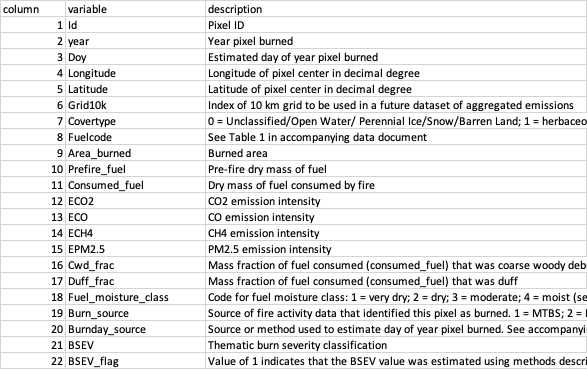

### Combine all csv's in a directory, into a new file. 

import os
import glob
import pandas as pd
os.chdir('/Users/AlfHaugen/Python/Wildfire_Data/9 Missoula Emisions Data RDS-2017-0039/Emissions_Year')

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

###combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
###export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

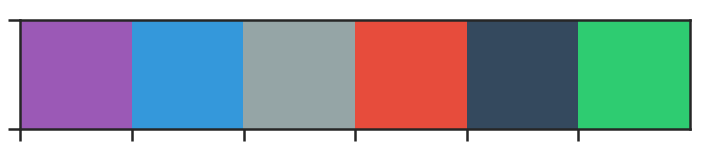

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import gmean
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

In [2]:
### Loading file into dataframe.
import pandas as pd
emdata = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/9 Missoula Emisions Data RDS-2017-0039/Emissions_Year/emissions_year2003to2015.csv')

# Review of Emissions Data Set / Data Analysis

In [3]:
emdata.shape

(7254534, 22)

In [4]:
pd.set_option('display.max_columns', 30)
emdata.head(5)

,id,year,doy,longitude,latitude,grid10k,covertype,fuelcode,area_burned,prefire_fuel,consumed_fuel,ECO2,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,burnday_source,BSEV,BSEV_flag
0,0,2008,359,-81.0384,25.1958,4536,3,1600,0.0,6220.097576,1999.75772,3347.594423,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0
1,1,2008,359,-81.0404,25.1984,4536,3,1600,62500.0,6220.097576,2041.37434,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,81,2,0
2,2,2008,359,-81.0380,25.1981,4536,3,1600,0.0,6220.097576,1999.75772,3347.594423,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0
3,3,2008,359,-81.0331,25.1973,4536,95,0,62500.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,1,81,2,0
4,4,2008,359,-81.0594,25.2035,4536,3,1600,0.0,6220.097576,1999.75772,3347.594423,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0


In [5]:
# Review of all unique years in combined file.
emdata['year'].unique()

array([2008, 2009, 2013, 2007, 2006, 2012, 2004, 2010, 2011, 2005, 2015,
       2014, 2003])

### Wrangling / Clean up of a few columns/rows:

#### Removing columns including: 1) 'id' which is the id from the original csv files from the soure by year, 2) 'grid10k, 'BSEV_flag', and 'burnday_source' given these are not useful. 

In [6]:
emdata_cleanv1 = emdata.drop(['id', 'grid10k', 'BSEV_flag', 'burn_source'], 1)

In [7]:
emyeartest = emdata_cleanv1.loc[(emdata_cleanv1['year'] < 2008) & (emdata_cleanv1['ECO2'] < 2200)]
emyeartest[0:5]

,year,doy,longitude,latitude,covertype,fuelcode,area_burned,prefire_fuel,consumed_fuel,ECO2,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burnday_source,BSEV
1326849,2007,121,-80.5707,25.6252,95,0,62500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,15,2
1326850,2007,121,-80.5585,25.6233,95,0,62500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,81,2
1326851,2007,121,-80.5561,25.6230,95,0,62500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,81,2
1326852,2007,121,-80.5537,25.6226,95,0,62500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,81,2
1326853,2007,121,-80.5512,25.6222,95,0,62500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,81,2


### Plot Emissionsn by Covertype to indicate that certain Cover Types containt zero values:

<Figure size 1440x432 with 0 Axes>

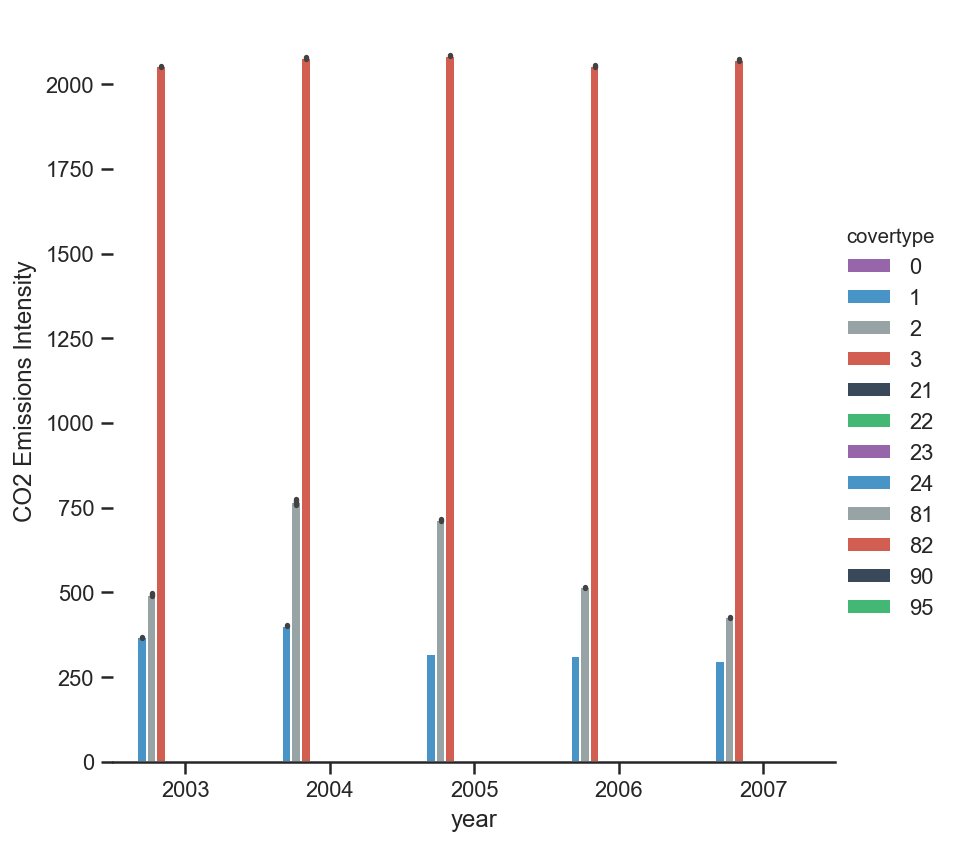

In [8]:
from numpy import median
plt.figure(figsize=(20, 6))

covertypeplot = sns.catplot(x="year", y="ECO2", hue='covertype', data=emyeartest,
                height=6, kind="bar", palette=flatui)
covertypeplot.despine(left=True)
covertypeplot.set_ylabels("CO2 Emissions Intensity")

#### Review/Count feature rows wtih Zero values. 

In [10]:
do = emdata_cleanv1[(emdata.prefire_fuel == 0)]
do2 = do['prefire_fuel'].value_counts()
eo = emdata_cleanv1[(emdata.consumed_fuel == 0)]
eo2 = do['consumed_fuel'].value_counts()
fo = emdata_cleanv1[(emdata.ECO2 == 0)]
fo2 = fo['ECO2'].value_counts()

print(do2)
print(eo2)
print(fo2)

0.0    1293962
Name: prefire_fuel, dtype: int64
0.0    1293962
Name: consumed_fuel, dtype: int64
0.0    1293962
Name: ECO2, dtype: int64


#### Removing the rows with Zero values across Prefire Fuel, Consumed Fuel Mass and ECO2. 

In [11]:
indexNames = emdata_cleanv1[(emdata_cleanv1.prefire_fuel == 0) & (emdata_cleanv1.consumed_fuel == 0) & (emdata_cleanv1.ECO2 == 0)].index
emdata_cleanv1.drop(indexNames, inplace=True)

In [12]:
emdata_cleanv1.shape

(5960572, 18)

In [14]:
# To see which fuel_moisture_classes are remaining after removal of zero value rows. 
emyeartest['fuel_moisture_class'].unique()

array([2, 3, 1, 4])

In [16]:
emdata_cleanv1.to_csv('/Users/AlfHaugen/Python/Wildfire_Data/FireExports/emissions_2003to2015_cleanv1.csv', encoding='utf-8')

## Statistial Analysis of Emissions Data for Key Features:

In [ ]:
# Statistical Methods - consolidating data metrics: shape, min, max, median:
# Area Burned:
a = emdata_cleanv1.shape
aa = emdata_cleanv1['area_burned'].min()
b = emdata_cleanv1['area_burned'].max()

# Covertype - determining the most frequent types:
c = sorted(emdata_cleanv1['covertype'].unique())
cc = emdata_cleanv1['covertype'].value_counts()

# Prefire Fuel
d = emdata_cleanv1['prefire_fuel'].min()
dd = emdata_cleanv1['prefire_fuel'].max()
ddd = emdata_cleanv1['prefire_fuel'].mean(skipna = True)
dddd = np.std(emdata_cleanv1['prefire_fuel'])
### Line to calc. the Geometric Mean; however zeros in data cause it to go Zero (will edit data to remvoe), 
ddddd = gmean(emdata_cleanv1.loc[:,'prefire_fuel'])
Q1d, mediand, Q3d = np.percentile(emdata['prefire_fuel'], [25,50,75])

# Consumed Fuel
e = emdata_cleanv1['consumed_fuel'].min()
ee = emdata_cleanv1['consumed_fuel'].max()
eee = emdata_cleanv1['consumed_fuel'].mean(skipna = True)
eeee = gmean(emdata_cleanv1.loc[:,'consumed_fuel'])
Q1e, mediane, Q3e = np.percentile(emdata_cleanv1['consumed_fuel'], [25,50,75])

# EC02
f = emdata_cleanv1['ECO2'].min()
ff = emdata_cleanv1['ECO2'].max()
fff = emdata_cleanv1['ECO2'].mean(skipna = True)
ffff = emdata_cleanv1['ECO2'].isnull().sum().sum()
fffff = gmean(emdata_cleanv1.loc[:,'ECO2'])
Q1f, medianf, Q3f = np.percentile(emdata_cleanv1['ECO2'], [25,50,75])

# Fuel Moisture Class
g = sorted(emdata_cleanv1['fuel_moisture_class'].unique())
gg = emdata_cleanv1['fuel_moisture_class'].value_counts()

# Thematic Burn Severity Classification
h = sorted(emdata_cleanv1['BSEV'].unique())
hh = emdata_cleanv1['BSEV'].value_counts()
hhh = emdata_cleanv1['BSEV'].isnull().sum().sum()

print(' ')
print ('Shape of the Emissions Data for 2003 to 2015 is ', a)
print(' ')
print('Covertype')
print ('Covertype value types are', c)
print ('Distribution frequency for each Covertype = ', cc)
print ("  ")
print('Fuel Moisture Type')
print('Fuel Moisture Type categories are', g)
print('Distribution frequency for each Fuel Moisture Type = ', gg)
print ("  ")
print('Burn Severity Classification - Thematic burn severity classification')
print('Burn Severity Categories are', h)
print('Distribution frequency for each BSEV category = ', hh)
print('Null Values = ', hhh)
print ("  ")
print ('Prefire Fuel Mass Analysis:')
print ('Prefire Fuel Mass Min Value =', d)
print ('Prefire Fuel Mass Max Value =', dd)
print ('Prefire Fuel Mass Mean =', ddd)
print ('Prefire Fuel Mass Standard Deviation =', dddd)
print ('Geometric Mean of Prefire Fuel = ', ddddd)
print ('25th, 50th, 75th Percentile:', Q1d, mediand, Q3d)
print ("  ")
print ('Consumed Fuel Mass Min Value =', e)
print ('PConsumed Fuel Mass Max Value =', ee)
print ('Consumed Fuel Mass Mean =', eee)
print ('Geometric Mean of Consumed Fuel emissions = ', eeee)
print(' ')
print ('ECO2 / CO2 emission intensity Min Value =', f)
print ('CO2 emission intensity Max Value =', ff)
print ('CO2 emission intensity Mean =', fff)
print ('Geometric Mean of CO2 emissions = ', fffff)
print ('25th, 50th, 75th Percentile:', Q1f, medianf, Q3f)
print(' ')
print(' ')
print ('Area Burned Feature Min Value =', aa)
print ('Area Burned Feature Max Value =', b)


Geometric Mean
multiply = 1
values = emdata['prefire_fuel']
n = len(values)

for i in values:
    if i == 0: 
        i = 1
    else:
        multiply = (multiply)*(i)

geometricMean = ((multiply)**(1/n))- 1293962
print(geometricMean)

# Emissions Histograms / Visuals

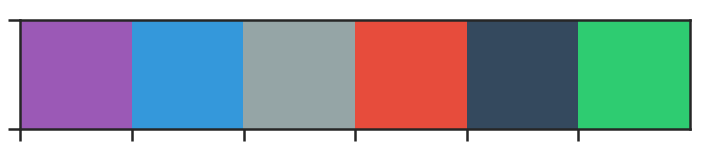

In [17]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

### Prefire Fuel Mass

Text(0, 0.5, 'Distributinon of PreFire Fuel Measurements')

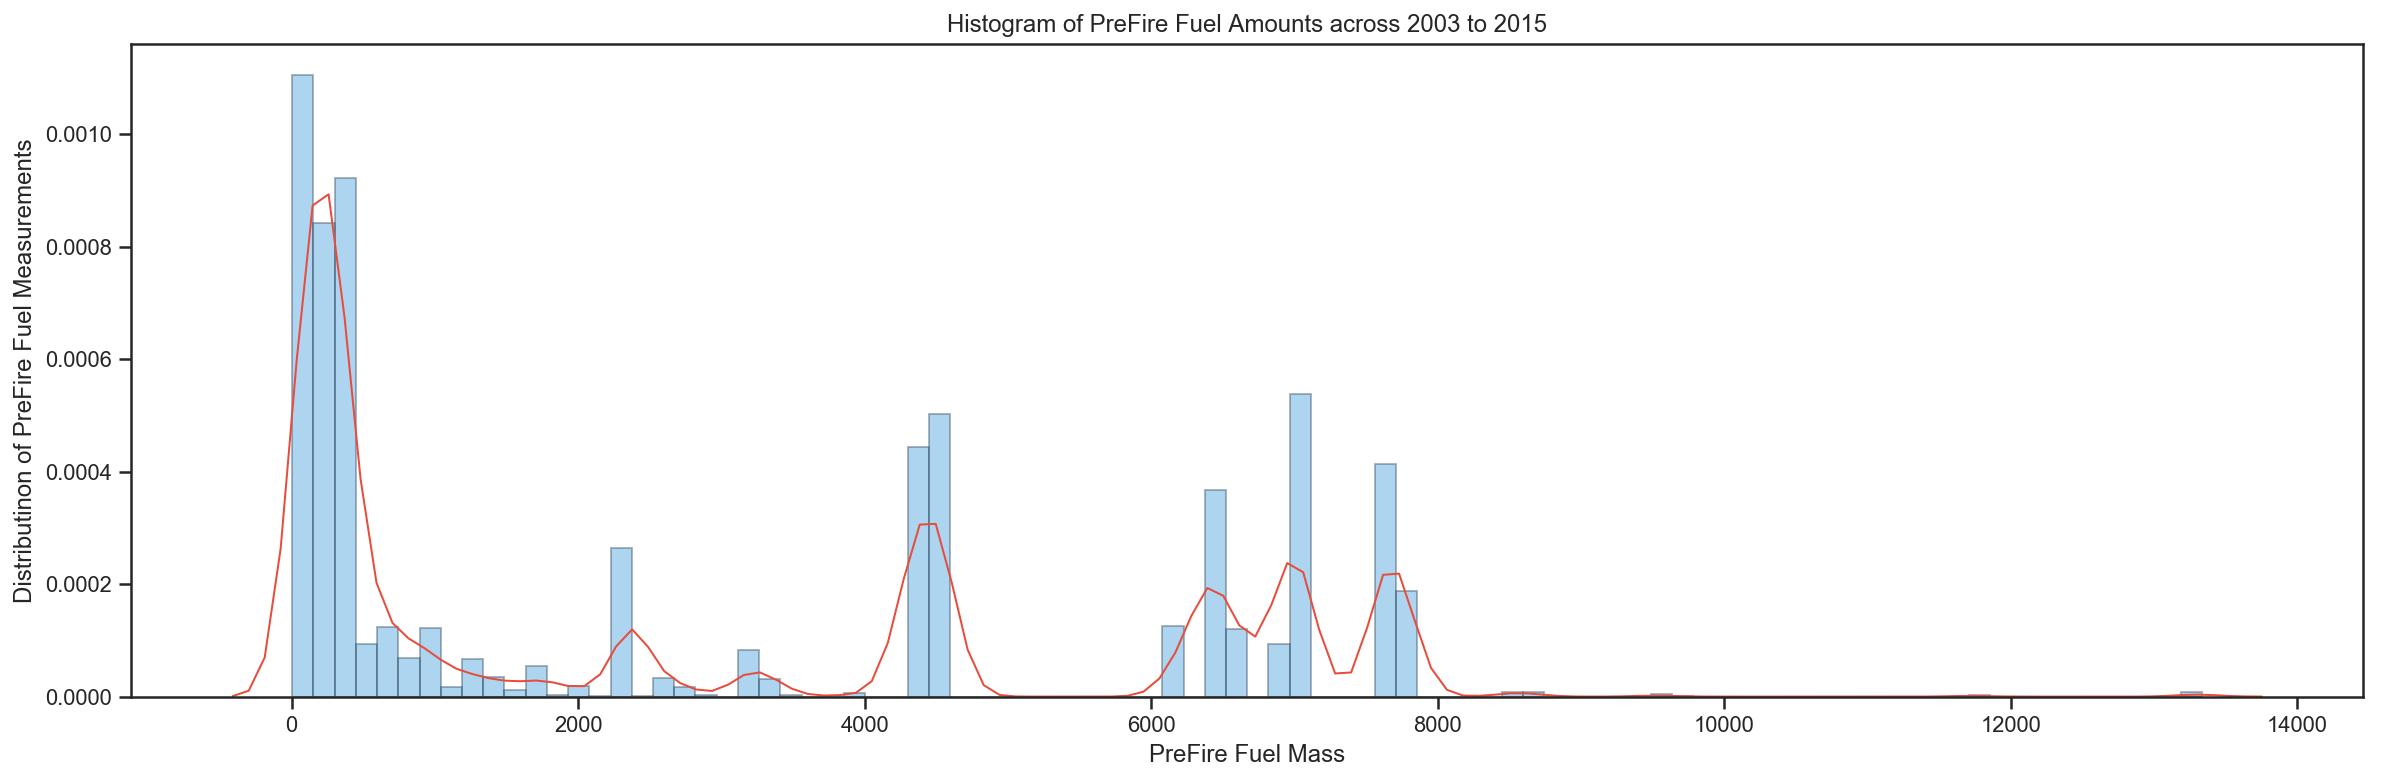

In [20]:
plt.figure(figsize=(20, 6))
sns.distplot(emdata_cleanv1['prefire_fuel'], hist = True, kde = True, bins=int(180/2), color = '#3498db', 
             kde_kws = {'shade': False, 'linewidth': 1, 'color': '#e74c3c'}, 
             hist_kws={'edgecolor':'#34495e'})
             #label = 'Prefuel Fire Mass')

plt.title('Histogram of PreFire Fuel Amounts across 2003 to 2015')
plt.xlabel('PreFire Fuel Mass')
plt.ylabel('Distributinon of PreFire Fuel Measurements')

sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
hald = [1,3,43,345,654,74,46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
gmean(hald)

In [ ]:
emdata['area_burned'].isnull().sum()

# Parse out a unique year from total Emissions Data to review and map.

In [ ]:
### Creating Variable: creating a variable to toggle/limit the dataset to one year/ while moving the long. and lat. to the west coast 
### (see below)

emyear2003 = emdata[(emdata.year == 2003) & (emdata.latitude > 34) & (emdata.longitude < -114)]
emyear2003[1:2]

In [ ]:
# Checking data shape for variable year. 
emyear2003.shape

In [ ]:
emyear2003[['ECO2', 'ECO', 'ECH4', 'EPM2.5']].agg(['mean','min','max','count'])

Mapping - initial map showed fires all over america, therefore you may input smaller dataframes using the variables above to hone in on year and geographical area.   

Notes - changes to matplotlib - color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12

Mapping ideas - https://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

In [ ]:
### Using variable dataset e.g., the entire set or 
import matplotlib.pyplot as plt
emyear2003.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

### Another plot to overlay intensity... in progress...
emyear2003.plot(kind="scatter", x="longitude", y="latitude",
    s=emyear2003['population']/100, label="population",
    c="prefire_fuel", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [ ]:
### Same as plot above, but overlaying onto a map. 
import numpy as np
import matplotlib.image as mpimg
california_img=mpimg.imread('/Users/AlfHaugen/Python/Wildfire_Data/californiamap.png')
ax = emyear2003.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=emyear2003['ECO'], label="CO Emissions Intensity",
                       c="prefire_fuel", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.3)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Longitude", fontsize=12)

prices = emyear2003["prefire_fuel"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=12)
cbar.set_label('Pre Fire Fuel', fontsize=16)

plt.legend(fontsize=12)
plt.show()

In [ ]:

#def graph_data(path, xkey='doy', ykey='eco'):
data = emyear2003
xval = data['doy']
yval = data['ECO']
#Year = emyear2003['year']

fig,axe = plt.subplots()
plt.scatter(xval, yval, alpha=0.7)
plt.ylim([0, data['ECO'].max()+100])

plt.ylabel('Emissions of CO')
plt.xlabel('Day of Year')
plt.title('Emission of CO by Day for 2003') 
#+ str(Year))

plt.grid(True)
plt.show()

#graph_data(emyear2003) # Or whatever your path is